In [1]:
# # Chapter 14: Going Deeper - The Mechanics of TensorFlow

In [2]:
from IPython.display import Image
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
import numpy as np

In [4]:
# ## 14.1. TensorFlow in a nutshell

In [5]:
g = tf.Graph()

## define the computation graph
with g.as_default():
    ## define tensors t1, t2, t3:
    t1 = tf.constant(np.pi)
    t2 = tf.constant([1, 2, 3, 4])
    t3 = tf.constant([[1, 2], [3, 4]])

    ## get their ranks
    r1 = tf.rank(t1)
    r2 = tf.rank(t2)
    r3 = tf.rank(t3)

    ## get their shapes
    s1 = t1.get_shape()
    s2 = t2.get_shape()
    s3 = t3.get_shape()
    print('Shapes:', s1, s2, s3)

with tf.Session(graph=g) as sess:
    print('Ranks:',
          r1.eval(),
          r2.eval(),
          r3.eval())

Shapes: () (4,) (2, 2)
Ranks: 0 1 2


In [6]:
# ## 14.2. Understanding TensorFlow's computation graph

In [7]:
g = tf.Graph()
 
## add nodes to the graph
with g.as_default():
    a = tf.constant(1, name='a')
    b = tf.constant(2, name='b') 
    c = tf.constant(3, name='c') 

    z = 2*(a-b) + c
    
## launch the graph
with tf.Session(graph=g) as sess:
    print('2*(a-b)+c => ', sess.run(z))

2*(a-b)+c =>  1


In [8]:
# ## 14.3. Working with TensorFlow’s placeholders, variables, and operations

In [9]:
# ### 14.3.1. Using placeholders for feeding data as input to a model in TensorFlow

In [10]:
# #### 14.3.1.1. Defining placeholders

In [11]:
g = tf.Graph()
with g.as_default():
    tf_a = tf.placeholder(tf.int32, shape=[],
                                    name='tf_a')
    tf_b = tf.placeholder(tf.int32, shape=[],
                                    name='tf_b') 
    tf_c = tf.placeholder(tf.int32, shape=[],
                                    name='tf_c') 

    r1 = tf_a-tf_b
    r2 = 2*r1
    z  = r2 + tf_c

In [12]:
# #### 14.3.1.2. Feeding placeholders with data

In [13]:
## launch the previous graph
with tf.Session(graph=g) as sess:
    feed = {tf_a: 1,
            tf_b: 2,
            tf_c: 3}
    print('z:',
          sess.run(z, feed_dict=feed))

z: 1


In [14]:
## launch the previous graph
with tf.Session(graph=g) as sess:
    ## execution without feeding tf_c
    feed = {tf_a: 1,
            tf_b: 2}
    print('r1:',
          sess.run(r1, feed_dict=feed))
    print('r2:',
          sess.run(r2, feed_dict=feed))

    ## execution with feeding tf_c
    feed = {tf_a: 1,
            tf_b: 2,
            tf_c: 3}
    print('r1:',
          sess.run(r1, feed_dict=feed))
    print('r2:',
          sess.run(r2, feed_dict=feed))

r1: -1
r2: -2
r1: -1
r2: -2


In [15]:
# #### 14.3.1.3. Defining placeholders for data arrays with varying batchsizes

In [16]:
g = tf.Graph()

with g.as_default():
    tf_x = tf.placeholder(tf.float32,
                                    shape=[None, 2],
                                    name='tf_x')

    x_mean = tf.reduce_mean(tf_x,
                                      axis=0,
                                      name='mean')

np.random.seed(123)
np.set_printoptions(precision=2)

with tf.Session(graph=g) as sess:
    x1 = np.random.uniform(low=0, high=1,
                           size=(5,2))
    print('Feeding data with shape', x1.shape)
    print('Result:', sess.run(x_mean, 
                             feed_dict={tf_x:x1}))
    x2 = np.random.uniform(low=0, high=1,
                           size=(10,2))
    print('Feeding data with shape', x2.shape)
    print('Result:', sess.run(x_mean,
                             feed_dict={tf_x:x2}))

Feeding data with shape (5, 2)
Result: [0.62 0.47]
Feeding data with shape (10, 2)
Result: [0.46 0.49]


In [17]:
print(tf_x)

Tensor("tf_x:0", shape=(None, 2), dtype=float32)


In [18]:
# ### 14.3.2. Variables in TensorFlow

In [19]:
# #### 13.3.2.1. Defining Variables

In [20]:
g1 = tf.Graph()

with g1.as_default():
    w = tf.Variable(np.array([[1, 2, 3, 4],
                              [5, 6, 7, 8]]), name='w')
    print(w)

<tf.Variable 'w:0' shape=(2, 4) dtype=int64>


In [21]:
# #### 13.3.2.2. Initializing variables

In [22]:
## initialize w and evaluate it
with tf.Session(graph=g1) as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(w))

[[1 2 3 4]
 [5 6 7 8]]


In [23]:
g2 = tf.Graph()

with g2.as_default():
    w1 = tf.Variable(1, name='w1')
    init_op = tf.global_variables_initializer()
    w2 = tf.Variable(2, name='w2')

In [24]:
with tf.Session(graph=g2) as sess:
    sess.run(init_op)
    print('w1:', sess.run(w1))

w1: 1


In [25]:
with tf.Session(graph=g2) as sess:

    try:
        sess.run(init_op)
        print('w2:', sess.run(w2))
    except tf.errors.FailedPreconditionError as e:
        print(e)

Error while reading resource variable w2 from Container: localhost. This could mean that the variable was uninitialized. Not found: Resource localhost/w2/N10tensorflow3VarE does not exist.
	 [[node w2/Read/ReadVariableOp (defined at <ipython-input-23-575e77343d32>:6) ]]

Original stack trace for 'w2/Read/ReadVariableOp':
  File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/opt/conda/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 127, in start
    self.asyncio_loo

In [26]:
# #### 13.3.2.3. Variable scope

In [27]:
g = tf.Graph()

with g.as_default():
    with tf.variable_scope('net_A'):
        with tf.variable_scope('layer-1'):
            w1 = tf.Variable(tf.random_normal(
                shape=(10,4)), name='weights')
        with tf.variable_scope('layer-2'):
            w2 = tf.Variable(tf.random_normal(
                shape=(20,10)), name='weights')
    with tf.variable_scope('net_B'):
        with tf.variable_scope('layer-1'):
            w3 = tf.Variable(tf.random_normal(
                shape=(10,4)), name='weights')

    print(w1)
    print(w2)
    print(w3)

<tf.Variable 'net_A/layer-1/weights:0' shape=(10, 4) dtype=float32>
<tf.Variable 'net_A/layer-2/weights:0' shape=(20, 10) dtype=float32>
<tf.Variable 'net_B/layer-1/weights:0' shape=(10, 4) dtype=float32>


In [28]:
# #### 13.3.2.4. Reusing variables

In [29]:
######################
## Helper functions ##
######################

def build_classifier(data, labels, n_classes=2):
    data_shape = data.get_shape().as_list()
    weights = tf.get_variable(name='weights',
                                        shape=(data_shape[1], n_classes),
                                        dtype=tf.float32)
    bias = tf.get_variable(name='bias',
                           initializer=tf.zeros(shape=n_classes))
    print(weights)
    print(bias)
    logits = tf.add(tf.matmul(data, weights),
                              bias, 
                              name='logits')
    print(logits)
    return logits, tf.nn.softmax(logits)

def build_generator(data, n_hidden):
    data_shape = data.get_shape().as_list()
    w1 = tf.Variable(
        tf.random_normal(shape=(data_shape[1],
                                          n_hidden)),
        name='w1')
    b1 = tf.Variable(tf.zeros(shape=n_hidden),
                               name='b1')
    hidden = tf.add(tf.matmul(data, w1), b1, 
                    name='hidden_pre-activation')
    hidden = tf.nn.relu(hidden, 'hidden_activation')

    w2 = tf.Variable(
        tf.random_normal(shape=(n_hidden,
                                          data_shape[1])),
        name='w2')
    b2 = tf.Variable(tf.zeros(shape=data_shape[1]),
                               name='b2')
    output = tf.add(tf.matmul(hidden, w2), b2,
                              name = 'output')
    return output, tf.nn.sigmoid(output)

########################
## Defining the graph ##
########################

batch_size=64
g = tf.Graph()

with g.as_default():
    tf_X = tf.placeholder(shape=(batch_size, 100),
                                    dtype=tf.float32,
                                    name='tf_X')
    ## build the generator
    with tf.variable_scope('generator'):
        gen_out1 = build_generator(data=tf_X,
                                   n_hidden=50)

    ## build the classifier
    with tf.variable_scope('classifier') as scope:
        ## classifier for the original data:
        cls_out1 = build_classifier(data=tf_X,
                                    labels=tf.ones(
                                        shape=batch_size))

        ## reuse the classifier for generated data
        scope.reuse_variables()
        cls_out2 = build_classifier(data=gen_out1[1],
                                    labels=tf.zeros(
                                        shape=batch_size))

        init_op = tf.global_variables_initializer()

<tf.Variable 'classifier/weights:0' shape=(100, 2) dtype=float32>
<tf.Variable 'classifier/bias:0' shape=(2,) dtype=float32>
Tensor("classifier/logits:0", shape=(64, 2), dtype=float32)
<tf.Variable 'classifier/weights:0' shape=(100, 2) dtype=float32>
<tf.Variable 'classifier/bias:0' shape=(2,) dtype=float32>
Tensor("classifier/logits_1:0", shape=(64, 2), dtype=float32)


In [30]:
## alternative way

g = tf.Graph()

with g.as_default():
    tf_X = tf.placeholder(shape=(batch_size, 100),
                                    dtype=tf.float32,
                                    name='tf_X')
    ## build the generator
    with tf.variable_scope('generator'):
        gen_out1 = build_generator(data=tf_X,
                                   n_hidden=50)

    ## build the classifier
    with tf.variable_scope('classifier'):
        ## classifier for the original data:
        cls_out1 = build_classifier(data=tf_X,
                                    labels=tf.ones(
                                        shape=batch_size))

    with tf.variable_scope('classifier', reuse=True):
        ## reuse the classifier for generated data
        cls_out2 = build_classifier(data=gen_out1[1],
                                    labels=tf.zeros(
                                        shape=batch_size))

        init_op = tf.global_variables_initializer()

<tf.Variable 'classifier/weights:0' shape=(100, 2) dtype=float32>
<tf.Variable 'classifier/bias:0' shape=(2,) dtype=float32>
Tensor("classifier/logits:0", shape=(64, 2), dtype=float32)
<tf.Variable 'classifier/weights:0' shape=(100, 2) dtype=float32>
<tf.Variable 'classifier/bias:0' shape=(2,) dtype=float32>
Tensor("classifier_1/logits:0", shape=(64, 2), dtype=float32)


In [31]:
# ## 14.3.3. Building a regression model

In [32]:
## define a graph
g = tf.Graph()

## define the computation graph
with g.as_default():
    ## placeholders
    tf.set_random_seed(123)
    tf_x = tf.placeholder(shape=(None),
                                    dtype=tf.float32,
                                    name='tf_x')
    tf_y = tf.placeholder(shape=(None),
                                    dtype=tf.float32,
                                    name='tf_y')

    ## define the variable (model parameters)
    weight = tf.Variable(
        tf.random_normal(
            shape=(1, 1),
            stddev=0.25),
        name='weight')
    bias = tf.Variable(0.0, name='bias')

    ## build the model
    y_hat = tf.add(weight * tf_x, bias,
                             name='y_hat')
    print(y_hat)

    ## compute the cost
    cost = tf.reduce_mean(tf.square(tf_y - y_hat),
                                    name='cost')
    print(cost)

    ## train
    optim = tf.train.GradientDescentOptimizer(
        learning_rate=0.001)
    train_op = optim.minimize(cost, name='train_op')

Tensor("y_hat:0", dtype=float32)
Tensor("cost:0", shape=(), dtype=float32)


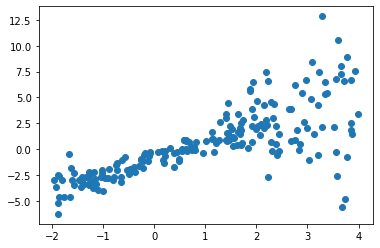

In [33]:
## create a random toy dataset for regression

np.random.seed(0)

def make_random_data():
    x = np.random.uniform(low=-2, high=4, size=200)
    y = []
    for t in x:
        r = np.random.normal(loc=0.0,
                             scale=(0.5 + t*t/3),
                             size=None)
        y.append(r)
    return  x, 1.726*x -0.84 + np.array(y)

x, y = make_random_data()

plt.plot(x, y, 'o')
plt.show()

In [34]:
# ### 14.3.4. Executing objects in a TensorFlow graph using their names

Epoch    0: 12.2230
Epoch   50: 8.3876
Epoch  100: 6.5721
Epoch  150: 5.6844
Epoch  200: 5.2269
Epoch  250: 4.9725
Epoch  300: 4.8169
Epoch  350: 4.7119
Epoch  400: 4.6347
Epoch  450: 4.5742


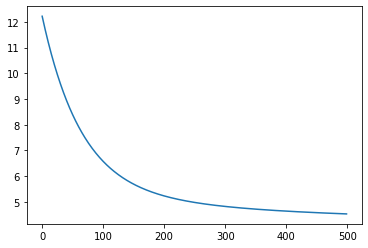

In [35]:
## train/test splits:
x_train, y_train = x[:100], y[:100]
x_test, y_test = x[100:], y[100:]

## training the model
n_epochs = 500
training_costs = []
with tf.Session(graph=g) as sess:
    ## first, run the variables initializer
    sess.run(tf.global_variables_initializer())

    ## train the model for n_epochs
    for e in range(n_epochs):
        c, _ = sess.run([cost, train_op],
                        feed_dict={tf_x: x_train,
                                   tf_y: y_train})
        training_costs.append(c)
        if not e % 50:
            print('Epoch %4d: %.4f' % (e, c))

plt.plot(training_costs)

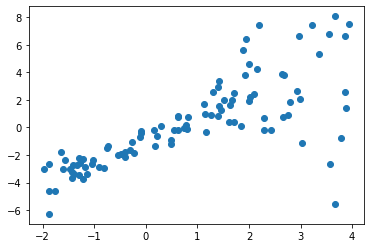

Epoch    0: 12.2230
Epoch   50: 8.3876
Epoch  100: 6.5721
Epoch  150: 5.6844
Epoch  200: 5.2269
Epoch  250: 4.9725
Epoch  300: 4.8169
Epoch  350: 4.7119
Epoch  400: 4.6347
Epoch  450: 4.5742


In [36]:
## train/test splits
x_train, y_train = x[:100], y[:100]
x_test, y_test = x[100:], y[100:]

## plot trainng data
plt.plot(x_train, y_train, 'o')
plt.show()

## training the model
n_epochs = 500
training_costs = []
with tf.Session(graph=g) as sess:
    ## first, run the variables initializer
    sess.run(tf.global_variables_initializer())

    ## train the model for n_eopchs
    for e in range(n_epochs):
        c, _ = sess.run(['cost:0', 'train_op'],
                        feed_dict={'tf_x:0': x_train,
                                   'tf_y:0': y_train})
        training_costs.append(c)
        if not e % 50:
            print('Epoch %4d: %.4f' % (e, c))

In [37]:
# ## 14.4. Saving and restoring a model in TensorFlow

In [38]:
## add saver to the graph
with g.as_default():
    saver = tf.train.Saver()

## training the model
n_epochs = 500
training_costs = []

with tf.Session(graph=g) as sess:
    ## first, run the variables initializer
    sess.run(tf.global_variables_initializer())

    ## train the model for n_epochs
    for e in range(n_epochs):
        c, _ = sess.run(['cost:0', 'train_op'],
                        feed_dict={'tf_x:0':x_train,
                                   'tf_y:0':y_train})
        training_costs.append(c)
        if not e % 50:
            print('Epoch %4d: %.4f' % (e, c))

    saver.save(sess, './trained-model')

Epoch    0: 12.2230
Epoch   50: 8.3876
Epoch  100: 6.5721
Epoch  150: 5.6844
Epoch  200: 5.2269
Epoch  250: 4.9725
Epoch  300: 4.8169
Epoch  350: 4.7119
Epoch  400: 4.6347
Epoch  450: 4.5742


In [39]:
## new file: loading a trained model
## and run the model on test set

g2 = tf.Graph()
with tf.Session(graph=g2) as sess:
    new_saver = tf.train.import_meta_graph(
        './trained-model.meta')
    new_saver.restore(sess, './trained-model')

    y_pred = sess.run('y_hat:0',
                      feed_dict={'tf_x:0' : x_test})

In [40]:
print('SSE: %.4f' % (np.sum(np.square(y_pred - y_test))))

SSE: 538.8118


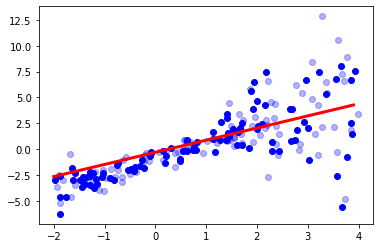

In [41]:
x_arr = np.arange(-2, 4, 0.1)

g2 = tf.Graph()
with tf.Session(graph=g2) as sess:
    new_saver = tf.train.import_meta_graph(
        './trained-model.meta')
    new_saver.restore(sess, './trained-model')

    y_arr = sess.run('y_hat:0',
                      feed_dict={'tf_x:0' : x_arr})

plt.figure()
plt.plot(x_train, y_train, 'bo')
plt.plot(x_test, y_test, 'bo', alpha=0.3)
plt.plot(x_arr, y_arr.T[:, 0], '-r', lw=3)
plt.show()

In [42]:
# ## 14.5. Transforming Tensors as multidimensional data arrays

In [43]:
g = tf.Graph()
with g.as_default():
    arr = np.array([[1., 2., 3., 3.5],
                    [4., 5., 6., 6.5],
                    [7., 8., 9., 9.5]])
    T1 = tf.constant(arr, name='T1')
    print(T1)
    s = T1.get_shape()
    print('Shape of T1 is', s)
    T2 = tf.Variable(tf.random_normal(
        shape=s))
    print(T2)
    T3 = tf.Variable(tf.random_normal(
        shape=(s.as_list()[0],)))
    print(T3)

Tensor("T1:0", shape=(3, 4), dtype=float64)
Shape of T1 is (3, 4)
<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32>
<tf.Variable 'Variable_1:0' shape=(3,) dtype=float32>


In [44]:
with g.as_default():
    T4 = tf.reshape(T1, shape=[1, 1, -1],
                              name='T4')
    print(T4)
    T5 = tf.reshape(T1, shape=[1, 3, -1],
                              name='T5')
    print(T5)

Tensor("T4:0", shape=(1, 1, 12), dtype=float64)
Tensor("T5:0", shape=(1, 3, 4), dtype=float64)


In [45]:
with tf.Session(graph = g) as sess:
    print(sess.run(T4)) 
    print()   
    print(sess.run(T5))

[[[1.  2.  3.  3.5 4.  5.  6.  6.5 7.  8.  9.  9.5]]]

[[[1.  2.  3.  3.5]
  [4.  5.  6.  6.5]
  [7.  8.  9.  9.5]]]


In [46]:
with g.as_default():
    T6 = tf.transpose(T5, perm=[2, 1, 0], 
                                name='T6')
    print(T6)
    T7 = tf.transpose(T5, perm=[0, 2, 1], 
                                name='T7')
    print(T7)

Tensor("T6:0", shape=(4, 3, 1), dtype=float64)
Tensor("T7:0", shape=(1, 4, 3), dtype=float64)


In [47]:
with g.as_default():
    t5_splt = tf.split(T5,
                                 num_or_size_splits=2,
                                 axis=2, name='T8')
    print(t5_splt)

[<tf.Tensor 'T8:0' shape=(1, 3, 2) dtype=float64>, <tf.Tensor 'T8:1' shape=(1, 3, 2) dtype=float64>]


In [48]:
g = tf.Graph()
with g.as_default():
    t1 = tf.ones(shape=(5, 1),
                           dtype=tf.float32, name='t1')
    t2 = tf.zeros(shape=(5, 1),
                           dtype=tf.float32, name='t2')
    print(t1)
    print(t2)

with g.as_default():
    t3 = tf.concat([t1, t2], axis=0, name='t3')
    print(t3)
    t4 = tf.concat([t1, t2], axis=1, name='t4')
    print(t4)

Tensor("t1:0", shape=(5, 1), dtype=float32)
Tensor("t2:0", shape=(5, 1), dtype=float32)
Tensor("t3:0", shape=(10, 1), dtype=float32)
Tensor("t4:0", shape=(5, 2), dtype=float32)


In [49]:
with tf.Session(graph = g) as sess:
    print(t3.eval())
    print()
    print(t4.eval())

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [50]:
# ## 14.6. Utilizing control flow mechanics in building graphs

In [51]:
## Python control flow

x, y = 1.0, 2.0

g = tf.Graph()
with g.as_default():
    tf_x = tf.placeholder(dtype=tf.float32,
                                    shape=None, name='tf_x')
    tf_y = tf.placeholder(dtype=tf.float32,
                                    shape=None, name='tf_y')
    if x < y:
        res = tf.add(tf_x, tf_y, name='result_add')
    else:
        res = tf.subtract(tf_x, tf_y, name='result_sub')

    print('Object: ', res)

with tf.Session(graph=g) as sess:
    print('x < y: %s -> Result:' % (x < y),
          res.eval(feed_dict={'tf_x:0': x,
                              'tf_y:0': y}))
    x, y = 2.0, 1.0
    print('x < y: %s -> Result:' % (x < y),
          res.eval(feed_dict={'tf_x:0': x,
                              'tf_y:0': y}))

    ## uncomment the next line if you want to visualize the graph in TensorBoard:
    file_writer = tf.summary.FileWriter(logdir='./logs/py-cflow/', graph=g)

Object:  Tensor("result_add:0", dtype=float32)
x < y: True -> Result: 3.0
x < y: False -> Result: 3.0


In [52]:
## TensorFlow control flow

x, y = 1.0, 2.0

g = tf.Graph()
with g.as_default():
    tf_x = tf.placeholder(dtype=tf.float32,
                                    shape=None, name='tf_x')
    tf_y = tf.placeholder(dtype=tf.float32,
                                    shape=None, name='tf_y')
    res = tf.cond(tf_x < tf_y,
                  lambda: tf.add(tf_x, tf_y,
                                           name='result_add'),
                  lambda: tf.subtract(tf_x, tf_y,
                                                name='result_sub'))
    print('Object:', res)

with tf.Session(graph=g) as sess:
    print('x < y: %s -> Result:' % (x < y),
          res.eval(feed_dict={'tf_x:0': x,
                              'tf_y:0': y}))
    x, y = 2.0, 1.0
    print('x < y: %s -> Result:' % (x < y),
          res.eval(feed_dict={'tf_x:0': x,
                              'tf_y:0': y}))

    #file_writer = tf.summary.FileWriter(logdir='./logs/tf-cond/', graph=g)

Object: Tensor("cond/Identity:0", dtype=float32)
x < y: True -> Result: 3.0
x < y: False -> Result: 1.0


In [53]:
# ## 14.6. Visualizing the graph with TensorBoard

In [54]:
import tensorflow.compat.v1 as tf

###########################
##   Helper functions    ##
###########################

def build_classifier(data, labels, n_classes=2):
    data_shape = data.get_shape().as_list()
    weights = tf.get_variable(name = 'weights',
                                        shape=(data_shape[1],
                                               n_classes),
                                        dtype=tf.float32)
    bias = tf.get_variable(name='bias',
                                     initializer=tf.zeros(
                                     shape=n_classes))
    print(weights)
    print(bias)
    logits = tf.add(tf.matmul(data, weights),
                              bias,
                              name='logits')
    print(logits)
    return logits, tf.nn.softmax(logits)


def build_generator(data, n_hidden):
    data_shape = data.get_shape().as_list()
    w1 = tf.Variable(
        tf.random_normal(shape=(data_shape[1],
                                          n_hidden)),
        name='w1')
    b1 = tf.Variable(tf.zeros(shape=n_hidden),
                               name='b1')
    hidden = tf.add(tf.matmul(data, w1), b1,
                              name='hidden_pre-activation')
    hidden = tf.nn.relu(hidden, 'hidden_activation')

    w2 = tf.Variable(
        tf.random_normal(shape=(n_hidden,
                                          data_shape[1])),
        name='w2')
    b2 = tf.Variable(tf.zeros(shape=data_shape[1]),
                               name='b2')
    output = tf.add(tf.matmul(hidden, w2), b2, 
                              name = 'output')
    return output, tf.nn.sigmoid(output)

###########################
##  Building the graph   ##
###########################

batch_size=64
g = tf.Graph()

with g.as_default():
    tf_X = tf.placeholder(shape=(batch_size, 100),
                                    dtype=tf.float32,
                                    name='tf_X')

    ## build the generator
    with tf.variable_scope('generator'):
        gen_out1 = build_generator(data=tf_X,
                                   n_hidden=50)

    ## build the classifier
    with tf.variable_scope('classifier') as scope:
        ## classifier for the original data:
        cls_out1 = build_classifier(data=tf_X,
                                    labels=tf.ones(
                                        shape=batch_size))

        ## reuse the classifier for generated data
        scope.reuse_variables()
        cls_out2 = build_classifier(data=gen_out1[1],
                                    labels=tf.zeros(
                                        shape=batch_size))

with tf.Session(graph = g) as sess:
    sess.run(tf.global_variables_initializer())

    file_writer = tf.summary.FileWriter(logdir='logs/', graph=g)

<tf.Variable 'classifier/weights:0' shape=(100, 2) dtype=float32>
<tf.Variable 'classifier/bias:0' shape=(2,) dtype=float32>
Tensor("classifier/logits:0", shape=(64, 2), dtype=float32)
<tf.Variable 'classifier/weights:0' shape=(100, 2) dtype=float32>
<tf.Variable 'classifier/bias:0' shape=(2,) dtype=float32>
Tensor("classifier/logits_1:0", shape=(64, 2), dtype=float32)
